<a href="https://colab.research.google.com/github/PeedroModa/An-lise_Seguran-a_SP/blob/main/An%C3%A1lise_Seguran%C3%A7a_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Introdução

A análise abaixo foi feita utilizando dados de dois datasets de Segurança no estado de São Paulo. Um deles possui dados das mais diversas ocorrências registradas dentro do estado de São Paulo, já o outro, se trata de ocorrências atendidas por policias. Esses dados estão datados de 2002 à 2021. Eles estão disponibilizados no site https://basedosdados.org/

Nossa motivação é entender quais são os municípios do estado de São Paulo que mais tiveram ocorrências, para que dessa forma, saibamos exatamente quais deles estão precisando de uma maior intervenção da polícia.

Além disso, vamos analisar o trabalho da polícia frente as ocorrências em cada município.

Perguntas que tentaremos responder com a análise:

  * Quais são os municípios com as maiores ocorrências dentro do Estado de São Paulo?
  * Qual o ano com o maior número de ocorrências? Será que existe alguma relação disso?
  * Quais são os três municípios mais perigosos segundo os dados desse dataset?
  * Houve alguma variação na taxa de perigo de cada município?
  * Qual foi o ano que mais se teve armas apreendidas pela polícia?
  * Qual foi o ano que mais se houve prisões?
  * Qual foi o ano que mais se teve veículos recuperados?
  <br>
  <br>
  <br>
  
  Fonte de dados: https://basedosdados.org/dataset/br-sp-gov-ssp?bdm_table=ocorrencias_registradas

# 1. Carregando bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('ggplot')




In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


# 2. Importando Datasets

In [ ]:
ocorrencias = pd.read_csv('ocorrencias_registradas.csv', sep = ',')

In [ ]:
ocorrencias.head(20)

,ano,mes,id_municipio,regiao_ssp,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
0,2003,1,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,16.0,0.0
1,2003,2,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,NaN,1.0,0.0,0.0,24.0,0.0
2,2003,3,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,29.0,1.0
3,2003,4,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,25.0,1.0
4,2003,5,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,NaN,0.0,0.0,1.0,33.0,0.0
5,2003,6,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,17.0,1.0
6,2003,7,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,25.0,0.0
7,2003,8,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,13.0,0.0
8,2003,9,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,25.0,0.0
9,2003,10,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,26.0,0.0


In [ ]:
ocorrencias.columns

Index(['ano', 'mes', 'id_municipio', 'regiao_ssp', 'homicidio_doloso',
       'numero_de_vitimas_em_homicidio_doloso',
       'homicidio_doloso_por_acidente_de_transito',
       'numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito',
       'homicidio_culposo_por_acidente_de_transito',
       'homicidio_culposo_outros', 'tentativa_de_homicidio',
       'lesao_corporal_seguida_de_morte', 'lesao_corporal_dolosa',
       'lesao_corporal_culposa_por_acidente_de_transito',
       'lesao_corporal_culposa_outras', 'latrocinio',
       'numero_de_vitimas_em_latrocinio', 'total_de_estupro', 'estupro',
       'estupro_de_vulneravel', 'total_de_roubo_outros', 'roubo_outros',
       'roubo_de_veiculo', 'roubo_a_banco', 'roubo_de_carga', 'furto_outros',
       'furto_de_veiculo'],
      dtype='object')

In [ ]:
policia = pd.read_csv('produtividade_policial.csv')

In [ ]:
policia.head()

,ano,mes,id_municipio,regiao_ssp,ocorrencias_de_porte_de_entorpecentes,ocorrencias_de_trafico_de_entorpecentes,ocorrencias_de_apreensao_de_entorpecentes,ocorrencias_de_porte_ilegal_de_arma,numero_de_armas_de_fogo_apreendidas,numero_de_flagrantes_lavrados,numero_de_infratores_apreendidos_em_flagrante,numero_de_infratores_apreendidos_por_mandado,numero_de_pessoas_presas_em_flagrante,numero_de_pessoas_presas_por_mandado,numero_de_prisoes_efetuadas,numero_de_veiculos_recuperados,total_de_inqueritos_policiais_instaurados
0,2003,1,3500105,Presidente Prudente,3.0,1.0,1.0,1.0,3.0,4.0,0.0,0.0,4.0,2.0,4.0,0.0,17.0
1,2003,2,3500105,Presidente Prudente,2.0,0.0,1.0,1.0,3.0,6.0,0.0,0.0,8.0,4.0,6.0,0.0,37.0
2,2003,3,3500105,Presidente Prudente,4.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,5.0,0.0,5.0,0.0,38.0
3,2003,4,3500105,Presidente Prudente,4.0,1.0,0.0,2.0,5.0,9.0,0.0,0.0,12.0,3.0,9.0,1.0,36.0
4,2003,5,3500105,Presidente Prudente,4.0,2.0,2.0,1.0,4.0,6.0,1.0,0.0,9.0,1.0,6.0,0.0,24.0


# 3. Obtendo maiores informações de ambos os Datasets

### Verificando a existência de missing values  (Dataset Ocorrencias).
  - Excluindo missing values.


In [ ]:
ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153876 entries, 0 to 153875
Data columns (total 27 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   ano                                                             153876 non-null  int64  
 1   mes                                                             153876 non-null  int64  
 2   id_municipio                                                    153876 non-null  int64  
 3   regiao_ssp                                                      153876 non-null  object 
 4   homicidio_doloso                                                151296 non-null  float64
 5   numero_de_vitimas_em_homicidio_doloso                           151296 non-null  float64
 6   homicidio_doloso_por_acidente_de_transito                       143700 non-null  float64
 7   numero_de_vitimas_em_homicidio_doloso_

In [ ]:
ocorrencias.isna().sum()

ano                                                                    0
mes                                                                    0
id_municipio                                                           0
regiao_ssp                                                             0
homicidio_doloso                                                    2580
numero_de_vitimas_em_homicidio_doloso                               2580
homicidio_doloso_por_acidente_de_transito                          10176
numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito     10176
homicidio_culposo_por_acidente_de_transito                          2580
homicidio_culposo_outros                                            2580
tentativa_de_homicidio                                              2580
lesao_corporal_seguida_de_morte                                    48648
lesao_corporal_dolosa                                               2580
lesao_corporal_culposa_por_acidente_de_transito    

###### Como podemos observar acima, existem uma grande quantidade de dados nulos em algumas colunas do dataset *ocorrências*, para não perdermos quase metade da amostra, excluiremos as colunas que mais possuem valores nulos para não afetar a análise e excluiremos também as colunas que não serão utilizadas.

In [ ]:
ocorrencias.drop(columns = ['lesao_corporal_seguida_de_morte'], axis = 1, inplace = True)
ocorrencias.drop(columns = ['estupro'], axis = 1, inplace = True)
ocorrencias.drop(columns = ['estupro_de_vulneravel'], axis = 1, inplace = True)
ocorrencias.drop(columns = ['roubo_outros'], axis = 1, inplace = True)
ocorrencias.drop(columns = ['numero_de_vitimas_em_homicidio_doloso'], axis = 1, inplace = True)
ocorrencias.drop(columns = ['numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito'], axis = 1, inplace = True)
ocorrencias.drop(columns = ['numero_de_vitimas_em_latrocinio'], axis = 1, inplace = True)
ocorrencias.drop(columns = ['id_municipio'], axis = 1, inplace = True)

In [ ]:
ocorrencias.isna().sum()

ano                                                    0
mes                                                    0
regiao_ssp                                             0
homicidio_doloso                                    2580
homicidio_doloso_por_acidente_de_transito          10176
homicidio_culposo_por_acidente_de_transito          2580
homicidio_culposo_outros                            2580
tentativa_de_homicidio                              2580
lesao_corporal_dolosa                               2580
lesao_corporal_culposa_por_acidente_de_transito     2580
lesao_corporal_culposa_outras                       2580
latrocinio                                          2580
total_de_estupro                                    2580
total_de_roubo_outros                               2580
roubo_de_veiculo                                    2580
roubo_a_banco                                       2580
roubo_de_carga                                      2580
furto_outros                   

In [ ]:
ocorrencias.dropna(how='any', axis = 0, inplace = True)

In [ ]:
ocorrencias.isna().sum()

ano                                                0
mes                                                0
regiao_ssp                                         0
homicidio_doloso                                   0
homicidio_doloso_por_acidente_de_transito          0
homicidio_culposo_por_acidente_de_transito         0
homicidio_culposo_outros                           0
tentativa_de_homicidio                             0
lesao_corporal_dolosa                              0
lesao_corporal_culposa_por_acidente_de_transito    0
lesao_corporal_culposa_outras                      0
latrocinio                                         0
total_de_estupro                                   0
total_de_roubo_outros                              0
roubo_de_veiculo                                   0
roubo_a_banco                                      0
roubo_de_carga                                     0
furto_outros                                       0
furto_de_veiculo                              

In [ ]:
ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143700 entries, 0 to 153875
Data columns (total 19 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   ano                                              143700 non-null  int64  
 1   mes                                              143700 non-null  int64  
 2   regiao_ssp                                       143700 non-null  object 
 3   homicidio_doloso                                 143700 non-null  float64
 4   homicidio_doloso_por_acidente_de_transito        143700 non-null  float64
 5   homicidio_culposo_por_acidente_de_transito       143700 non-null  float64
 6   homicidio_culposo_outros                         143700 non-null  float64
 7   tentativa_de_homicidio                           143700 non-null  float64
 8   lesao_corporal_dolosa                            143700 non-null  float64
 9   lesao_corporal_

### Verificando a existência de missing values. (Dataset Policia).
  - Excluindo missing values.


In [ ]:
policia.isna().sum()

ano                                                 0
mes                                                 0
id_municipio                                        0
regiao_ssp                                          0
ocorrencias_de_porte_de_entorpecentes            2580
ocorrencias_de_trafico_de_entorpecentes          2580
ocorrencias_de_apreensao_de_entorpecentes        2580
ocorrencias_de_porte_ilegal_de_arma              2580
numero_de_armas_de_fogo_apreendidas              2580
numero_de_flagrantes_lavrados                    2580
numero_de_infratores_apreendidos_em_flagrante    2580
numero_de_infratores_apreendidos_por_mandado     2580
numero_de_pessoas_presas_em_flagrante            2580
numero_de_pessoas_presas_por_mandado             2580
numero_de_prisoes_efetuadas                      2580
numero_de_veiculos_recuperados                   2580
total_de_inqueritos_policiais_instaurados        2580
dtype: int64

In [ ]:
policia.dropna(how='any', axis = 0, inplace = True)

In [ ]:
policia.isna().sum()

ano                                              0
mes                                              0
id_municipio                                     0
regiao_ssp                                       0
ocorrencias_de_porte_de_entorpecentes            0
ocorrencias_de_trafico_de_entorpecentes          0
ocorrencias_de_apreensao_de_entorpecentes        0
ocorrencias_de_porte_ilegal_de_arma              0
numero_de_armas_de_fogo_apreendidas              0
numero_de_flagrantes_lavrados                    0
numero_de_infratores_apreendidos_em_flagrante    0
numero_de_infratores_apreendidos_por_mandado     0
numero_de_pessoas_presas_em_flagrante            0
numero_de_pessoas_presas_por_mandado             0
numero_de_prisoes_efetuadas                      0
numero_de_veiculos_recuperados                   0
total_de_inqueritos_policiais_instaurados        0
dtype: int64

In [ ]:
policia.drop(columns = ['id_municipio'], axis = 1, inplace = True)

In [ ]:
policia.head()

,ano,mes,regiao_ssp,ocorrencias_de_porte_de_entorpecentes,ocorrencias_de_trafico_de_entorpecentes,ocorrencias_de_apreensao_de_entorpecentes,ocorrencias_de_porte_ilegal_de_arma,numero_de_armas_de_fogo_apreendidas,numero_de_flagrantes_lavrados,numero_de_infratores_apreendidos_em_flagrante,numero_de_infratores_apreendidos_por_mandado,numero_de_pessoas_presas_em_flagrante,numero_de_pessoas_presas_por_mandado,numero_de_prisoes_efetuadas,numero_de_veiculos_recuperados,total_de_inqueritos_policiais_instaurados
0,2003,1,Presidente Prudente,3.0,1.0,1.0,1.0,3.0,4.0,0.0,0.0,4.0,2.0,4.0,0.0,17.0
1,2003,2,Presidente Prudente,2.0,0.0,1.0,1.0,3.0,6.0,0.0,0.0,8.0,4.0,6.0,0.0,37.0
2,2003,3,Presidente Prudente,4.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,5.0,0.0,5.0,0.0,38.0
3,2003,4,Presidente Prudente,4.0,1.0,0.0,2.0,5.0,9.0,0.0,0.0,12.0,3.0,9.0,1.0,36.0
4,2003,5,Presidente Prudente,4.0,2.0,2.0,1.0,4.0,6.0,1.0,0.0,9.0,1.0,6.0,0.0,24.0


### Renomeando alguns itens e alterando tipo de algumas colunas (Dataset Ocorrencias)

In [ ]:
ocorrencias['regiao_ssp'].unique()

array(['Presidente Prudente', 'Ribeirão Preto', 'Sorocaba',
       'São José do Rio Preto', 'Bauru',
       'Grande São Paulo (exclui a Capital)', 'Araçatuba',
       'São José dos Campos', 'Campinas', 'Piracicaba', 'Santos',
       'Capital'], dtype=object)

In [ ]:
filtro_regiao = {'Capital': 'São Paulo'}
ocorrencias.replace(filtro_regiao, inplace = True)

In [ ]:
filtro_mes = {1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho',
              7:'Julho', 8:'Agosto',9:'Setembro',10:'Outubro',11:'Novembro',12:'Dezembro'}
ocorrencias['mes'].replace(filtro_mes, inplace = True)

In [ ]:
ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143700 entries, 0 to 153875
Data columns (total 19 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   ano                                              143700 non-null  int64  
 1   mes                                              143700 non-null  object 
 2   regiao_ssp                                       143700 non-null  object 
 3   homicidio_doloso                                 143700 non-null  float64
 4   homicidio_doloso_por_acidente_de_transito        143700 non-null  float64
 5   homicidio_culposo_por_acidente_de_transito       143700 non-null  float64
 6   homicidio_culposo_outros                         143700 non-null  float64
 7   tentativa_de_homicidio                           143700 non-null  float64
 8   lesao_corporal_dolosa                            143700 non-null  float64
 9   lesao_corporal_

In [ ]:
filtro_tipos = ['homicidio_culposo_por_acidente_de_transito',
                'homicidio_culposo_outros','tentativa_de_homicidio','lesao_corporal_dolosa','lesao_corporal_culposa_por_acidente_de_transito',
                'lesao_corporal_culposa_outras','latrocinio','total_de_estupro','total_de_roubo_outros',
                'roubo_de_veiculo','roubo_a_banco','roubo_de_carga','furto_outros','furto_de_veiculo', 'homicidio_doloso','homicidio_doloso_por_acidente_de_transito'
                ]

Decidimos alterar o tipo das colunas acima para o tipo ***'INT'*** por se tratarem de números inteiros, não existe meio acidente culposo, ou até meio roubo. Por serem números cheios, o melhor tipo para essas colunas é 'INT'.

In [ ]:
ocorrencias[filtro_tipos] = ocorrencias[filtro_tipos].apply(lambda x: x.astype('int'))

In [ ]:
ocorrencias.describe()

,ano,homicidio_doloso,homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,tentativa_de_homicidio,lesao_corporal_dolosa,lesao_corporal_culposa_por_acidente_de_transito,lesao_corporal_culposa_outras,latrocinio,total_de_estupro,total_de_roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
count,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000
mean,2011.359248,0.687954,0.003292,0.544384,0.032269,0.759576,21.640689,15.240438,0.550967,0.041990,1.063027,33.451795,9.593145,0.025880,0.957669,68.177745,13.854078
std,5.832036,6.956798,0.069767,2.413131,0.327444,5.532159,121.978816,83.308188,4.875677,0.426675,7.474384,438.787174,130.189442,0.499248,14.447521,614.136278,157.505022
min,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.000000,0.000000
75%,2017.000000,0.000000,0.000000,1.000000,0.000000,0.000000,17.000000,9.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,34.000000,2.000000
max,2021.000000,474.000000,8.000000,91.000000,33.000000,288.000000,4283.000000,2724.000000,254.000000,25.000000,329.000000,14927.000000,5082.000000,34.000000,655.000000,25063.000000,5296.000000


### Renomeando alguns itens e alterando tipo de algumas colunas (Dataset Policia)

In [ ]:
policia['regiao_ssp'].unique()

array(['Presidente Prudente', 'Araçatuba', 'Ribeirão Preto', 'Bauru',
       'Santos', 'Piracicaba', 'São José do Rio Preto', 'Sorocaba',
       'Campinas', 'Grande São Paulo (exclui a Capital)',
       'São José dos Campos', 'Capital'], dtype=object)

In [ ]:
policia.replace(filtro_regiao, inplace = True)
policia['mes'].replace(filtro_mes, inplace = True)

In [ ]:
policia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147756 entries, 0 to 150335
Data columns (total 16 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   ano                                            147756 non-null  int64  
 1   mes                                            147756 non-null  object 
 2   regiao_ssp                                     147756 non-null  object 
 3   ocorrencias_de_porte_de_entorpecentes          147756 non-null  float64
 4   ocorrencias_de_trafico_de_entorpecentes        147756 non-null  float64
 5   ocorrencias_de_apreensao_de_entorpecentes      147756 non-null  float64
 6   ocorrencias_de_porte_ilegal_de_arma            147756 non-null  float64
 7   numero_de_armas_de_fogo_apreendidas            147756 non-null  float64
 8   numero_de_flagrantes_lavrados                  147756 non-null  float64
 9   numero_de_infratores_apreendidos_em_f

In [ ]:
filtro_tipos_policia = ['ocorrencias_de_porte_de_entorpecentes', 'ocorrencias_de_trafico_de_entorpecentes', 'ocorrencias_de_apreensao_de_entorpecentes',
                        'ocorrencias_de_porte_ilegal_de_arma', 'numero_de_armas_de_fogo_apreendidas', 'numero_de_flagrantes_lavrados', 'numero_de_infratores_apreendidos_em_flagrante',
                        'numero_de_infratores_apreendidos_por_mandado', 'numero_de_pessoas_presas_em_flagrante', 'numero_de_pessoas_presas_por_mandado', 'numero_de_prisoes_efetuadas',
                        'numero_de_veiculos_recuperados', 'total_de_inqueritos_policiais_instaurados']

In [ ]:
policia[filtro_tipos_policia] = policia[filtro_tipos_policia].apply(lambda x: x.astype('int'))

In [ ]:
policia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147756 entries, 0 to 150335
Data columns (total 16 columns):
 #   Column                                         Non-Null Count   Dtype 
---  ------                                         --------------   ----- 
 0   ano                                            147756 non-null  int64 
 1   mes                                            147756 non-null  object
 2   regiao_ssp                                     147756 non-null  object
 3   ocorrencias_de_porte_de_entorpecentes          147756 non-null  int64 
 4   ocorrencias_de_trafico_de_entorpecentes        147756 non-null  int64 
 5   ocorrencias_de_apreensao_de_entorpecentes      147756 non-null  int64 
 6   ocorrencias_de_porte_ilegal_de_arma            147756 non-null  int64 
 7   numero_de_armas_de_fogo_apreendidas            147756 non-null  int64 
 8   numero_de_flagrantes_lavrados                  147756 non-null  int64 
 9   numero_de_infratores_apreendidos_em_flagrante  1

# 4. Respondendo algumas perguntas.

#### Pergunta 1. Quais são os municípios com as maiores ocorrências dentro do Estado de São Paulo?

* Aqui foram utilizadas todas as colunas do Dataset OCORRÊNCIAS.

In [ ]:
ocorrencias.columns

Index(['ano', 'mes', 'regiao_ssp', 'homicidio_doloso',
       'homicidio_doloso_por_acidente_de_transito',
       'homicidio_culposo_por_acidente_de_transito',
       'homicidio_culposo_outros', 'tentativa_de_homicidio',
       'lesao_corporal_dolosa',
       'lesao_corporal_culposa_por_acidente_de_transito',
       'lesao_corporal_culposa_outras', 'latrocinio', 'total_de_estupro',
       'total_de_roubo_outros', 'roubo_de_veiculo', 'roubo_a_banco',
       'roubo_de_carga', 'furto_outros', 'furto_de_veiculo'],
      dtype='object')

In [ ]:
ocorrencias_por_municipio = ocorrencias.groupby(['regiao_ssp']).sum()

In [ ]:
ocorrencias_por_municipio.drop(columns = ['ano'], axis = 1, inplace = True)

In [ ]:
ocorrencias_por_municipio.head()

,homicidio_doloso,homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,tentativa_de_homicidio,lesao_corporal_dolosa,lesao_corporal_culposa_por_acidente_de_transito,lesao_corporal_culposa_outras,latrocinio,total_de_estupro,total_de_roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
regiao_ssp,,,,,,,,,,,,,,,,
Araçatuba,1519,4,1816,123,2989,77376,79281,1849,81,3152,22752,1585,19,82,193805,10291
Bauru,2329,26,4259,182,3729,183948,143452,2872,190,7049,47691,2867,39,517,407824,27989
Campinas,7144,34,8494,430,7397,261747,221231,7236,504,11706,292173,113965,220,8150,794066,173241
Grande São Paulo (exclui a Capital),25346,73,11611,766,22555,486282,313827,12127,1268,31330,995634,376375,543,33139,1256628,390406
Piracicaba,5758,42,6599,303,7519,267129,241701,3379,319,8285,183021,52342,126,4572,603718,132702


In [ ]:
numero_ocorrencias_por_municipio = pd.DataFrame(ocorrencias_por_municipio.sum(axis=1))

In [ ]:
numero_ocorrencias_por_municipio.reset_index(inplace = True)

In [ ]:
filtro_colunas = {'regiao_ssp': 'Região_Município', 0: 'Total_Ocorrências'}
numero_ocorrencias_por_municipio.rename(columns = filtro_colunas, inplace = True)


In [ ]:
numero_ocorrencias_por_municipio

,Região_Município,Total_Ocorrências
0,Araçatuba,396724
1,Bauru,834963
2,Campinas,1907738
3,Grande São Paulo (exclui a Capital),3957910
4,Piracicaba,1517515
5,Presidente Prudente,452807
6,Ribeirão Preto,1689238
7,Santos,1293069
8,Sorocaba,1159620
9,São José do Rio Preto,703091


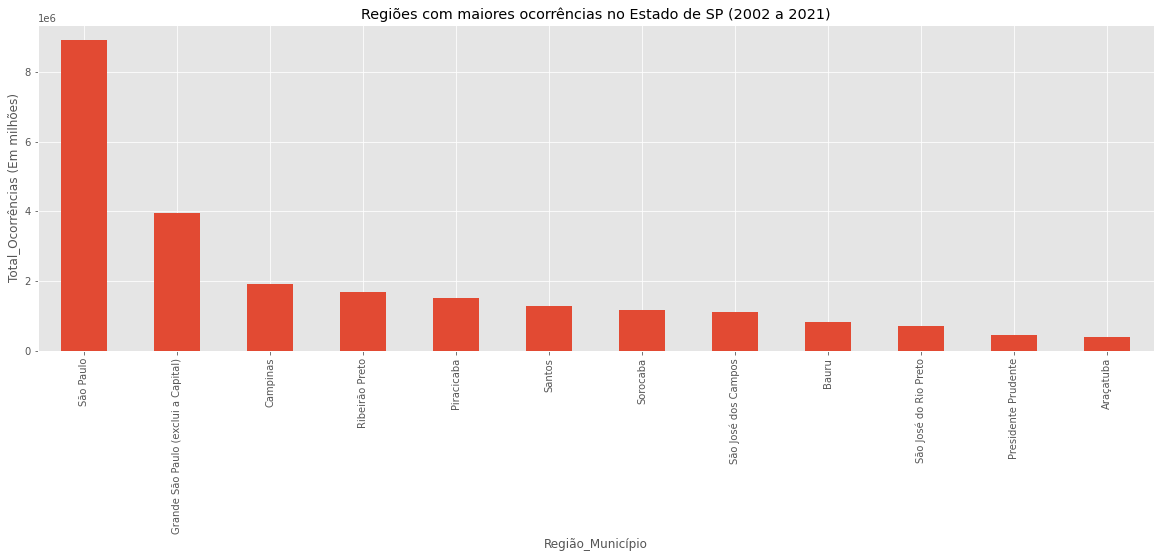

In [ ]:
_ = ocorrencias_por_municipio.sum(axis=1).sort_values(ascending = False).plot(kind = 'bar', figsize = (20,6), xlabel = 'Região_Município', ylabel = 'Total_Ocorrências (Em milhões)', title = 'Regiões com maiores ocorrências no Estado de SP (2002 a 2021)')


Respondendo a pergunta 1, como já esperado, a cidade de São Paulo foi a que mais houve ocorrências dos mais diversos tipos.

#### Pergunta 2. Qual o ano com o maior número de ocorrências?

In [ ]:
ocorrencias_por_ano = ocorrencias.groupby(by = 'ano').sum()
numero_ocorrencias_por_ano = pd.DataFrame(ocorrencias_por_ano.sum(axis=1))
numero_ocorrencias_por_ano.reset_index(inplace = True)
filtro_colunas_ano = {'ano': 'Ano', 0: 'Total_Ocorrências_Ano'}
numero_ocorrencias_por_ano.rename(columns = filtro_colunas_ano, inplace = True)

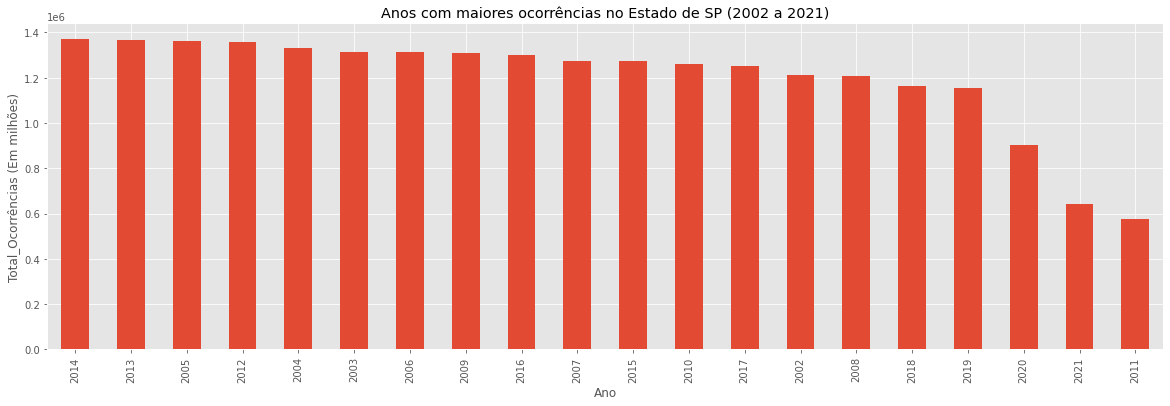

In [ ]:
ocorrencias_por_ano.sum(axis = 1).sort_values(ascending = False).plot(kind = 'bar', figsize = (20,6), xlabel = 'Ano', ylabel = 'Total_Ocorrências (Em milhões)', title = 'Anos com maiores ocorrências no Estado de SP (2002 a 2021)')

Através do gráfico acima, podevemos verificar qual foi o ano que mais houveram ocorrências e o ano que menos houveram ocorrências. Entretanto, o fato curioso é: Se com o passar dos anos esperamos que o numero de ocorrências diminua, o que fez o ano de 2011 ser o ano com menor número de ocorrências? Será que descobriremos algo no Dataset sobre a produtividade policial neste ano específico?

#### Para se responder às questões seguintes devemos descrever o conceito das colunas e selecionar apenas ocorrências que tiveram intenção de serem praticadas.

* regiao_ssp = Região do Estado de São Paulo.
* homicidio_doloso = Crime com intenção. O agente quer ou assume o resultado.
* numero_de_vitimas_em_homicidio_doloso = Número de vítimas em um crime com intenção de matar.
* homicidio_doloso_por_acidente_de_transito = Crime com intenção. O agente quer ou assume o resultado. Nesse caso, com acidente de trânsito.
* numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito = Número de vítimas em um crime com intenção de matar. Nesse caso, com acidente de trânsito.
* homicidio_culposo_por_acidente_de_transito = Crime praticado sem intenção. O agente não quer nem assume o resultado.
* homicidio_culposo_outros = Outros tipos de Crimes praticados sem intenção. O agente não quer nem assume o resultado.
* tentativa_de_homicidio = Tentativa de um crime com intenção.
* lesao_corporal_dolosa = Lesão corporal provocada com intenção de ferir.
* lesao_corporal_culposa_por_acidente_de_transito = Acidente de transito sem a intenção de causá-lo. Exemplo: Acidente motivado por Embriaguez.
* lesao_corporal_culposa_outras = Outros tipos de lesão corporal sem a intenção de causá-la.
* latrocinio = é uma forma qualificada do crime de roubo, com aumento de pena, quando a violência empregada resulta em morte.
* numero_de_vitimas_em_latrocinio = Numero de pessoas envolvida em algum tipo de latrocínio.
* total_de_estupro = Total do número de estupros.
* total_de_roubo_outros = Total do número de roubos (Pessoas, residencias)
* roubo_de_veiculo = Número de roubo de veículos.
* roubo_a_banco = Número de roubo de bancos.
* roubo_de_carga = Número de roubo de cargas de caminhões.
* furto_outros = Total do número de furtos (Pessoas, residencias)
* furto_de_veiculo = Número de furto de veículos.
<br>
<br>
<br>
<br>

Sabendo do conceito de cada coluna, deveremos trabalhar apenas com aquelas que remetem a violência/crime com intenção e que de certa forma oferecem risco a vida. Desta forma, abaixo iremos limitar ainda mais nosso Dataset para conter apenas ocorrências que oferecem risco a vida para que possamos encontrar a taxa de perigo de cada região.

* Taxa de perigo = Número de Ocorrências / Número de habitantes

In [ ]:
ocorrencias_intencionadas = ocorrencias.copy(deep = True)
ocorrencias_intencionadas.drop(columns = ['homicidio_culposo_por_acidente_de_transito'], axis = 1, inplace = True)
ocorrencias_intencionadas.drop(columns = ['homicidio_culposo_outros'], axis = 1, inplace = True)
ocorrencias_intencionadas.drop(columns = ['lesao_corporal_culposa_por_acidente_de_transito'], axis = 1, inplace = True)
ocorrencias_intencionadas.drop(columns = ['lesao_corporal_culposa_outras'], axis = 1, inplace = True)
ocorrencias_intencionadas.drop(columns = ['total_de_roubo_outros'], axis = 1, inplace = True)
ocorrencias_intencionadas.drop(columns = ['roubo_de_veiculo'], axis = 1, inplace = True)
ocorrencias_intencionadas.drop(columns = ['roubo_a_banco'], axis = 1, inplace = True)
ocorrencias_intencionadas.drop(columns = ['roubo_de_carga'], axis = 1, inplace = True)
ocorrencias_intencionadas.drop(columns = ['furto_outros'], axis = 1, inplace = True)
ocorrencias_intencionadas.drop(columns = ['furto_de_veiculo'], axis = 1, inplace = True)

 #### Pergunta 3. Quais foram os municípios mais perigosos segundo os dados desse dataset?

Aqui foram utilizadas apenas as colunas :

* 'homicidio_doloso'
* 'homicidio_doloso_por_acidente_de_transito'
* 'tentativa_de_homicidio'
* 'lesao_corporal_dolosa'
*  'latrocinio'
*  'total_de_estupro'


##### Para se responder a essa questão, tivemos que realizar uma raspagem de dados e obter o número de habitantes em cada região. Foi encontrado apenas dados populacionais dos anos de 2010,2016,2017,2018,2019,2020 e 2021, por esse motivo, vamos verificar qual foi a região mais perigosa através da sua taxa de perigo (numero de ocorrencias / numero de habitantes)

In [ ]:
ocorrencia_intencionadas_ano = ocorrencias_intencionadas.groupby(['ano', 'regiao_ssp']).sum()

In [ ]:
numero_ocorrencias_intencionadas_ano = pd.DataFrame(ocorrencia_intencionadas_ano.sum(axis=1))
numero_ocorrencias_intencionadas_ano = numero_ocorrencias_intencionadas_ano.reset_index()

##### Realizando raspagem de dados populacionais

In [ ]:
def populacao_regiao(ano, regiao_ssp):
  if ano == 2021 and  regiao_ssp == 'Araçatuba':
    return 199210
  elif ano == 2020 and regiao_ssp == 'Araçatuba':
    return 198129
  elif ano == 2019 and regiao_ssp == 'Araçatuba':
    return 197016
  elif ano == 2018 and regiao_ssp == 'Araçatuba':
    return 195874
  elif ano == 2017 and regiao_ssp == 'Araçatuba':
    return 194874
  elif ano == 2016 and regiao_ssp == 'Araçatuba':
    return 193874
  elif ano == 2010 and regiao_ssp == 'Araçatuba':
    return 181579
  elif ano == 2021 and regiao_ssp == 'Bauru':
    return 381706
  elif ano == 2020 and regiao_ssp == 'Bauru':
    return 379297
  elif ano == 2019 and regiao_ssp == 'Bauru':
    return 376818
  elif ano == 2018 and regiao_ssp == 'Bauru':
    return 374272
  elif ano == 2017 and regiao_ssp == 'Bauru':
    return 371690
  elif ano == 2016 and regiao_ssp == 'Bauru':
    return 369368
  elif ano == 2010 and regiao_ssp == 'Bauru':
    return 343937
  elif ano == 2021 and regiao_ssp == 'Campinas':
    return 1223237
  elif ano == 2020 and regiao_ssp == 'Campinas':
    return 1213792
  elif ano == 2019 and regiao_ssp == 'Campinas':
    return 1204073
  elif ano == 2018 and regiao_ssp == 'Campinas':
    return 1194094
  elif ano == 2017 and regiao_ssp == 'Campinas':
    return 1182429
  elif ano == 2016 and regiao_ssp == 'Campinas':
    return 1173370
  elif ano == 2010 and regiao_ssp == 'Campinas':
    return 1080113
  elif ano == 2021 and regiao_ssp == 'Grande São Paulo (exclui a Capital)':
    return 9652132
  elif ano == 2020 and regiao_ssp == 'Grande São Paulo (exclui a Capital)':
    return 9742844
  elif ano == 2019 and regiao_ssp == 'Grande São Paulo (exclui a Capital)':
    return 9556080
  elif ano == 2018 and regiao_ssp == 'Grande São Paulo (exclui a Capital)':
    return 9459788
  elif ano == 2017 and regiao_ssp == 'Grande São Paulo (exclui a Capital)':
    return 9365768
  elif ano == 2016 and regiao_ssp == 'Grande São Paulo (exclui a Capital)':
    return 9247169
  elif ano == 2010 and regiao_ssp == 'Grande São Paulo (exclui a Capital)':
    return 8664541
  elif ano == 2021 and regiao_ssp == 'Piracicaba':
    return 410275
  elif ano == 2020 and regiao_ssp == 'Piracicaba':
    return 407252
  elif ano == 2019 and regiao_ssp == 'Piracicaba':
    return 404142
  elif ano == 2018 and regiao_ssp == 'Piracicaba':
    return 400949
  elif ano == 2017 and regiao_ssp == 'Piracicaba':
    return 397322
  elif ano == 2016 and regiao_ssp == 'Piracicaba':
    return 394419
  elif ano == 2010 and regiao_ssp == 'Piracicaba':
    return 364571
  elif ano == 2021 and regiao_ssp == 'Presidente Prudente':
    return 231953
  elif ano == 2020 and regiao_ssp == 'Presidente Prudente':
    return 230371
  elif ano == 2019 and regiao_ssp == 'Presidente Prudente':
    return 228743
  elif ano == 2018 and regiao_ssp == 'Presidente Prudente':
    return 227072
  elif ano == 2017 and regiao_ssp == 'Presidente Prudente':
    return 225271
  elif ano == 2016 and regiao_ssp == 'Presidente Prudente':
    return 225271
  elif ano == 2010 and regiao_ssp == 'Presidente Prudente':
    return 207610
  elif ano == 2021 and regiao_ssp == 'Ribeirão Preto':
    return 720116
  elif ano == 2020 and regiao_ssp == 'Ribeirão Preto':
    return 711825
  elif ano == 2019 and regiao_ssp == 'Ribeirão Preto':
    return 703293
  elif ano == 2018 and regiao_ssp == 'Ribeirão Preto':
    return 694534
  elif ano == 2017 and regiao_ssp == 'Ribeirão Preto':
    return 682302
  elif ano == 2016 and regiao_ssp == 'Ribeirão Preto':
    return 674405
  elif ano == 2010 and regiao_ssp == 'Ribeirão Preto':
    return 604682
  elif ano == 2021 and regiao_ssp == 'Santos':
    return 433991
  elif ano == 2020 and regiao_ssp == 'Santos':
    return 433656
  elif ano == 2019 and regiao_ssp == 'Santos':
    return 433311
  elif ano == 2018 and regiao_ssp == 'Santos':
    return 432957
  elif ano == 2017 and regiao_ssp == 'Santos':
    return 434742
  elif ano == 2016 and regiao_ssp == 'Santos':
    return 434359
  elif ano == 2010 and regiao_ssp == 'Santos':
    return 419400
  elif ano == 2021 and regiao_ssp == 'Sorocaba':
    return 695328
  elif ano == 2020 and regiao_ssp == 'Sorocaba':
    return 687357
  elif ano == 2019 and regiao_ssp == 'Sorocaba':
    return 679378
  elif ano == 2018 and regiao_ssp == 'Sorocaba':
    return 671186
  elif ano == 2017 and regiao_ssp == 'Sorocaba':
    return 659871
  elif ano == 2016 and regiao_ssp == 'Sorocaba':
    return 652481
  elif ano == 2010 and regiao_ssp == 'Sorocaba':
    return 586625
  elif ano == 2021 and regiao_ssp == 'São José do Rio Preto':
    return 469173
  elif ano == 2020 and regiao_ssp == 'São José do Rio Preto':
    return 464983
  elif ano == 2019 and regiao_ssp == 'São José do Rio Preto':
    return 460671
  elif ano == 2018 and regiao_ssp == 'São José do Rio Preto':
    return 456245
  elif ano == 2017 and regiao_ssp == 'São José do Rio Preto':
    return 450657
  elif ano == 2016 and regiao_ssp == 'São José do Rio Preto':
    return 446649
  elif ano == 2010 and regiao_ssp == 'São José do Rio Preto':
    return 408258
  elif ano == 2021 and regiao_ssp == 'São José dos Campos':
    return 737310
  elif ano == 2020 and regiao_ssp == 'São José dos Campos':
    return 729737
  elif ano == 2019 and regiao_ssp == 'São José dos Campos':
    return 721944
  elif ano == 2018 and regiao_ssp == 'São José dos Campos':
    return 713943
  elif ano == 2017 and regiao_ssp == 'São José dos Campos':
    return 703219
  elif ano == 2016 and regiao_ssp == 'São José dos Campos':
    return 695992
  elif ano == 2010 and regiao_ssp == 'São José dos Campos':
    return 629921
  elif ano == 2021 and regiao_ssp == 'São Paulo':
    return 12396372
  elif ano == 2020 and regiao_ssp == 'São Paulo':
    return 12325232
  elif ano == 2019 and regiao_ssp == 'São Paulo':
    return 12252023
  elif ano == 2018 and regiao_ssp == 'São Paulo':
    return 12176866
  elif ano == 2017 and regiao_ssp == 'São Paulo':
    return 12106920
  elif ano == 2016 and regiao_ssp == 'São Paulo':
    return 12038175
  elif ano == 2010 and regiao_ssp == 'São Paulo':
    return 11253503
  else:
    return 0






In [ ]:
numero_ocorrencias_intencionadas_ano['População'] = numero_ocorrencias_intencionadas_ano.apply(lambda x: populacao_regiao(x['ano'], x['regiao_ssp']), axis = 1)
filtro_colunas_intencionais = {'ano': 'Ano', 'regiao_ssp': 'Região/Município', 0: 'Total_Ocorrências'}
numero_ocorrencias_intencionadas_ano.rename(columns = filtro_colunas_intencionais, inplace = True)

In [ ]:
numero_ocorrencias_intencionadas_ano

,Ano,Região/Município,Total_Ocorrências,População
0,2002,Araçatuba,5877,0
1,2002,Bauru,13008,0
2,2002,Campinas,16406,0
3,2002,Grande São Paulo (exclui a Capital),32905,0
4,2002,Piracicaba,18014,0
...,...,...,...,...
230,2021,Santos,4167,433991
231,2021,Sorocaba,6194,695328
232,2021,São José do Rio Preto,4076,469173
233,2021,São José dos Campos,5127,737310


##### Criando coluna taxa de violência.

In [ ]:
numero_ocorrencias_intencionadas_ano['Taxa de violência'] = round((numero_ocorrencias_intencionadas_ano['Total_Ocorrências'] / numero_ocorrencias_intencionadas_ano['População']),4)

In [ ]:
numero_ocorrencias_intencionadas_ano

,Ano,Região/Município,Total_Ocorrências,População,Taxa de violência
0,2002,Araçatuba,5877,0,inf
1,2002,Bauru,13008,0,inf
2,2002,Campinas,16406,0,inf
3,2002,Grande São Paulo (exclui a Capital),32905,0,inf
4,2002,Piracicaba,18014,0,inf
...,...,...,...,...,...
230,2021,Santos,4167,433991,0.0096
231,2021,Sorocaba,6194,695328,0.0089
232,2021,São José do Rio Preto,4076,469173,0.0087
233,2021,São José dos Campos,5127,737310,0.0070


Criando um Dataframe apenas com os anos de 2010,2016,2017,2018,2019,2020,2021.

In [ ]:
regioes_mais_perigosas_2010 = numero_ocorrencias_intencionadas_ano[numero_ocorrencias_intencionadas_ano['Ano'] == 2010]
regioes_mais_perigosas_2016 = numero_ocorrencias_intencionadas_ano[numero_ocorrencias_intencionadas_ano['Ano'] == 2016]
regioes_mais_perigosas_2017 = numero_ocorrencias_intencionadas_ano[numero_ocorrencias_intencionadas_ano['Ano'] == 2017]
regioes_mais_perigosas_2018 = numero_ocorrencias_intencionadas_ano[numero_ocorrencias_intencionadas_ano['Ano'] == 2018]
regioes_mais_perigosas_2019 = numero_ocorrencias_intencionadas_ano[numero_ocorrencias_intencionadas_ano['Ano'] == 2019]
regioes_mais_perigosas_2020 = numero_ocorrencias_intencionadas_ano[numero_ocorrencias_intencionadas_ano['Ano'] == 2020]
regioes_mais_perigosas_2021 = numero_ocorrencias_intencionadas_ano[numero_ocorrencias_intencionadas_ano['Ano'] == 2021]
regioes_mais_perigosas = pd.concat([regioes_mais_perigosas_2010,regioes_mais_perigosas_2016,regioes_mais_perigosas_2017,regioes_mais_perigosas_2018,regioes_mais_perigosas_2019,regioes_mais_perigosas_2020,regioes_mais_perigosas_2021])

In [ ]:
regioes_mais_perigosas.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 96 to 234
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ano                84 non-null     int64  
 1   Região/Município   84 non-null     object 
 2   Total_Ocorrências  84 non-null     int64  
 3   População          84 non-null     int64  
 4   Taxa de violência  84 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.9+ KB


In [ ]:
regioes_mais_perigosas['População'] = regioes_mais_perigosas['População'].astype('int')

In [ ]:
regioes_mais_perigosas.index = range(regioes_mais_perigosas.shape[0])

##### Convertendo minha coluna 'Ano' para o tipo Datetime.

In [ ]:
def ano_mes_dia(Ano):
  if Ano == 2021:
    return '2021-01-01'
  elif Ano == 2020:
    return '2020-01-01'
  elif Ano == 2019:
    return '2019-01-01'
  elif Ano == 2018:
    return '2018-01-01'
  elif Ano == 2017:
    return '2017-01-01'
  elif Ano == 2016:
    return '2016-01-01'
  elif Ano == 2010:
    return '2010-01-01'

In [ ]:
regioes_mais_perigosas['Ano'] = regioes_mais_perigosas['Ano'].apply(ano_mes_dia)

In [ ]:
regioes_mais_perigosas.head()

,Ano,Região/Município,Total_Ocorrências,População,Taxa de violência
0,2010-01-01,Araçatuba,4832,181579,0.0266
1,2010-01-01,Bauru,10197,343937,0.0296
2,2010-01-01,Campinas,16102,1080113,0.0149
3,2010-01-01,Grande São Paulo (exclui a Capital),33295,8664541,0.0038
4,2010-01-01,Piracicaba,17038,364571,0.0467


In [ ]:
regioes_mais_perigosas['Ano'] = pd.to_datetime(regioes_mais_perigosas['Ano'])

In [ ]:
regioes_mais_perigosas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Ano                84 non-null     datetime64[ns]
 1   Região/Município   84 non-null     object        
 2   Total_Ocorrências  84 non-null     int64         
 3   População          84 non-null     int64         
 4   Taxa de violência  84 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.4+ KB


Text(0.0, 1.0, 'Variação da taxa de perigo ao longo de 2010 a 2021')

Text(0.5, 0, 'Tempo')

Text(0, 0.5, 'Taxa de Perigo')

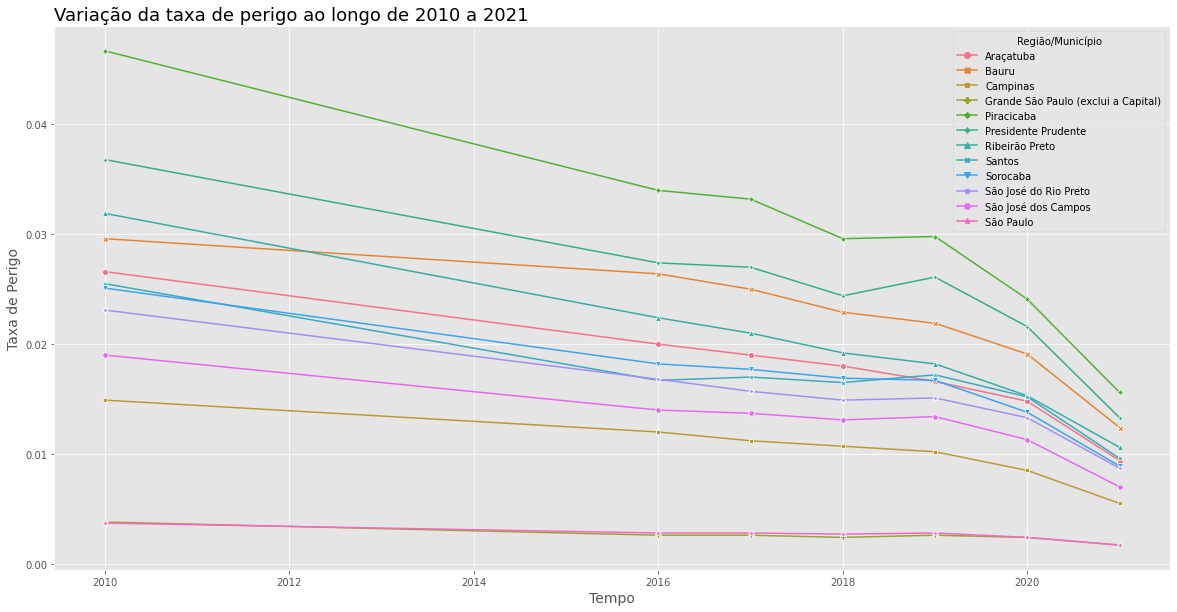

In [ ]:
ax = sns.lineplot(
    data=regioes_mais_perigosas,
    x="Ano", y="Taxa de violência", hue="Região/Município", style="Região/Município",
    markers=True, dashes=False
)
ax.figure.set_size_inches(20,10)
ax.set_title('Variação da taxa de perigo ao longo de 2010 a 2021', loc='left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Taxa de Perigo', fontsize = 14)
ax = ax

Respondendo a pergunta 3, podemos constatar que no ano de 2021 os municípios mais perigosos devido a sua taxa de perigo estar mais próxima de 1 foram:

* Piracicaba
* Presidente Prudente
* Bauru

O que é válido ressaltar é que os três municípios seguem tendo a maior taxa de perigo desde 2016, Bauru ultrapassou Ribeirão Preto na linha de tempo de 2010 a 2016.

O que talvez justifique essa queda na taxa de perigo nos municípios a partir do ano 2018 é a PANDEMIA GLOBAL DO COVID-19 e também o uso do PIX para realizar pagamentos.

A pandemia fez com que pessoas evitassem sair de casa, evitando assim o sucesso de criminosos em praticar algum tipo de crime. Já o uso do PIX, dificultou a vida dos criminosos por não ter muita circulação de dinheiro em espécie no mercado, invibializando a prática dos crimes.

#### Pergunta 4. Houve alguma variação na taxa de perigo de cada município?

Através do gráfico acima podemos observar que houve sim variação na taxa de perigo dos munícipios, alguns deles chamando mais atenção do que outros.

Um município que chama atenção é Presidente Prudente, que em 2018 teve uma boa redução na taxa de perigo, entretanto em 2019 praticamente igualou a taxa com o ano de 2017, aumentando novamente esse valor. O mesmo ocorre com Piracicaba nos mesmos anos, porém com um menor aumento nessa taxa.

O que podemos constatar é que com o passar dos tempos, os municípios se tornaram mais "seguros" devido a redução em sua taxa de perigo.

#### Pergunta 5. Qual foi o ano que mais se teve armas apreendidas pela polícia?

In [ ]:
policia.head()

,ano,mes,regiao_ssp,ocorrencias_de_porte_de_entorpecentes,ocorrencias_de_trafico_de_entorpecentes,ocorrencias_de_apreensao_de_entorpecentes,ocorrencias_de_porte_ilegal_de_arma,numero_de_armas_de_fogo_apreendidas,numero_de_flagrantes_lavrados,numero_de_infratores_apreendidos_em_flagrante,numero_de_infratores_apreendidos_por_mandado,numero_de_pessoas_presas_em_flagrante,numero_de_pessoas_presas_por_mandado,numero_de_prisoes_efetuadas,numero_de_veiculos_recuperados,total_de_inqueritos_policiais_instaurados
0,2003,Janeiro,Presidente Prudente,3,1,1,1,3,4,0,0,4,2,4,0,17
1,2003,Fevereiro,Presidente Prudente,2,0,1,1,3,6,0,0,8,4,6,0,37
2,2003,Março,Presidente Prudente,4,0,0,0,0,5,3,0,5,0,5,0,38
3,2003,Abril,Presidente Prudente,4,1,0,2,5,9,0,0,12,3,9,1,36
4,2003,Maio,Presidente Prudente,4,2,2,1,4,6,1,0,9,1,6,0,24


In [ ]:
policia.columns

Index(['ano', 'mes', 'regiao_ssp', 'ocorrencias_de_porte_de_entorpecentes',
       'ocorrencias_de_trafico_de_entorpecentes',
       'ocorrencias_de_apreensao_de_entorpecentes',
       'ocorrencias_de_porte_ilegal_de_arma',
       'numero_de_armas_de_fogo_apreendidas', 'numero_de_flagrantes_lavrados',
       'numero_de_infratores_apreendidos_em_flagrante',
       'numero_de_infratores_apreendidos_por_mandado',
       'numero_de_pessoas_presas_em_flagrante',
       'numero_de_pessoas_presas_por_mandado', 'numero_de_prisoes_efetuadas',
       'numero_de_veiculos_recuperados',
       'total_de_inqueritos_policiais_instaurados'],
      dtype='object')

In [ ]:
policia_copia = policia[:]

In [ ]:
policia_copia.head()

,ano,mes,regiao_ssp,ocorrencias_de_porte_de_entorpecentes,ocorrencias_de_trafico_de_entorpecentes,ocorrencias_de_apreensao_de_entorpecentes,ocorrencias_de_porte_ilegal_de_arma,numero_de_armas_de_fogo_apreendidas,numero_de_flagrantes_lavrados,numero_de_infratores_apreendidos_em_flagrante,numero_de_infratores_apreendidos_por_mandado,numero_de_pessoas_presas_em_flagrante,numero_de_pessoas_presas_por_mandado,numero_de_prisoes_efetuadas,numero_de_veiculos_recuperados,total_de_inqueritos_policiais_instaurados
0,2003,Janeiro,Presidente Prudente,3,1,1,1,3,4,0,0,4,2,4,0,17
1,2003,Fevereiro,Presidente Prudente,2,0,1,1,3,6,0,0,8,4,6,0,37
2,2003,Março,Presidente Prudente,4,0,0,0,0,5,3,0,5,0,5,0,38
3,2003,Abril,Presidente Prudente,4,1,0,2,5,9,0,0,12,3,9,1,36
4,2003,Maio,Presidente Prudente,4,2,2,1,4,6,1,0,9,1,6,0,24


In [ ]:
policia_ano_armas = policia_copia[['ano', 'numero_de_armas_de_fogo_apreendidas']]
policia_ano_armas.head()

,ano,numero_de_armas_de_fogo_apreendidas
0,2003,3
1,2003,3
2,2003,0
3,2003,5
4,2003,4


In [ ]:
policia_ano_armas_groupby = policia_ano_armas.groupby(by = 'ano').sum()

In [ ]:
policia_ano_armas_groupby = policia_ano_armas_groupby.reset_index()

In [ ]:
policia_ano_armas_groupby

,ano,numero_de_armas_de_fogo_apreendidas
0,2002,37625
1,2003,39083
2,2004,34636
3,2005,31260
4,2006,24801
5,2007,22735
6,2008,19451
7,2009,21744
8,2010,18653
9,2011,18819


Text(0.0, 1.0, 'Quantidade de armas de fogo apreendidas em cada ano (2002 a 2021)')

Text(0.5, 0, 'Anos')

Text(0, 0.5, 'Quantidade')

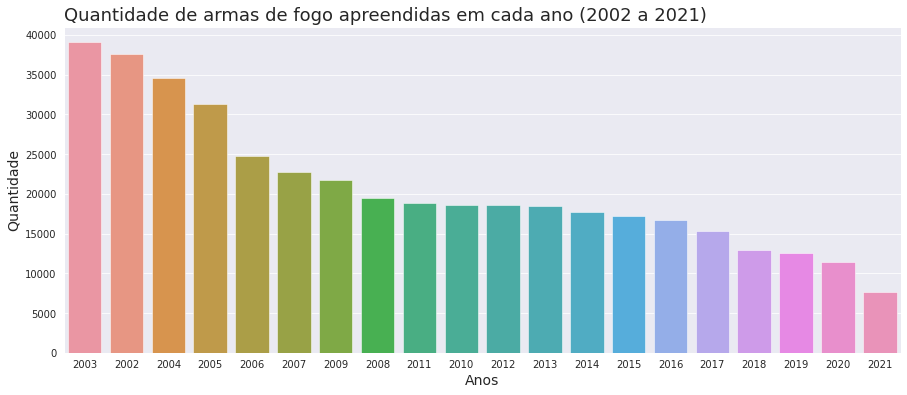

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.barplot(x='ano',
            y="numero_de_armas_de_fogo_apreendidas", data=policia_ano_armas_groupby,
            order=policia_ano_armas_groupby.sort_values('numero_de_armas_de_fogo_apreendidas',ascending = False).ano)
ax.figure.set_size_inches(15,6)
ax.set_title('Quantidade de armas de fogo apreendidas em cada ano (2002 a 2021)', loc='left', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax = ax

#### Pergunta 6. Qual foi o ano que mais se houve prisões?

In [ ]:
policia_ano_prisao = policia_copia[['ano', 'numero_de_prisoes_efetuadas']]
policia_ano_prisao_groupby = policia_ano_prisao.groupby(by = 'ano').sum()
policia_ano_prisao_groupby = policia_ano_prisao_groupby.reset_index()

Text(0.0, 1.0, 'Quantidade prisões efetuadas em cada ano (2002 a 2021)')

Text(0.5, 0, 'Anos')

Text(0, 0.5, 'Quantidade')

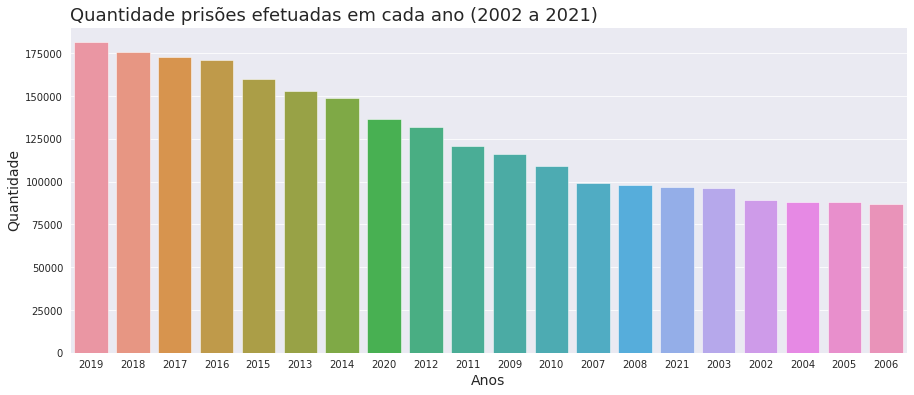

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.barplot(x='ano',
            y="numero_de_prisoes_efetuadas", data=policia_ano_prisao_groupby,
            order=policia_ano_prisao_groupby.sort_values('numero_de_prisoes_efetuadas',ascending = False).ano)
ax.figure.set_size_inches(15,6)
ax.set_title('Quantidade prisões efetuadas em cada ano (2002 a 2021)', loc='left', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax = ax

#### Pergunta 7. Qual foi o ano que mais se teve veículos recuperados?

In [ ]:
policia_ano_veiculos_recuperados = policia_copia[['ano', 'numero_de_veiculos_recuperados']]
policia_ano_veiculos_recuperados_groupby = policia_ano_veiculos_recuperados.groupby(by = 'ano').sum()
policia_ano_veiculos_recuperados_groupby = policia_ano_veiculos_recuperados_groupby.reset_index()

Text(0.0, 1.0, 'Quantidade de veículos recuperados em cada ano (2002 a 2021)')

Text(0.5, 0, 'Anos')

Text(0, 0.5, 'Quantidade')

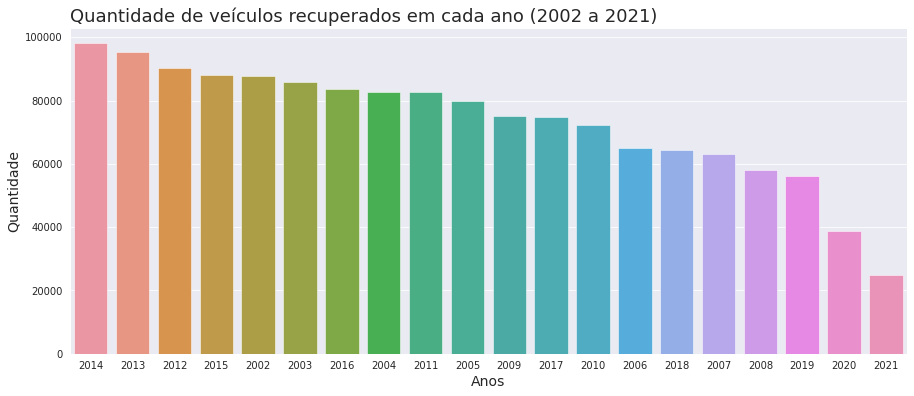

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.barplot(x='ano',
            y="numero_de_veiculos_recuperados", data=policia_ano_veiculos_recuperados_groupby,
            order=policia_ano_veiculos_recuperados_groupby.sort_values('numero_de_veiculos_recuperados',ascending = False).ano)
ax.figure.set_size_inches(15,6)
ax.set_title('Quantidade de veículos recuperados em cada ano (2002 a 2021)', loc='left', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax = ax